In [1]:
import pandas as pd

In [6]:
sampl_path = r"\quora-insincere-questions-classification\sample_submission.csv"
test_path = r"quora-insincere-questions-classification\test.csv"
train_path = r"quora-insincere-questions-classification\train.csv"

In [8]:
test_df = pd.read_csv(test_path)
train_df = pd.read_csv(train_path)
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [9]:
test_df.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [11]:
train_df.shape

(1306122, 3)

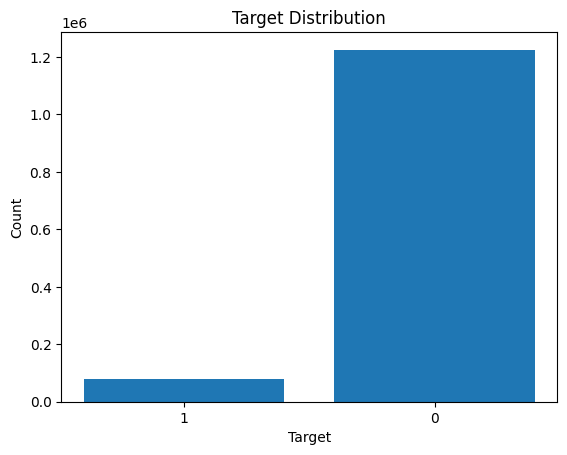

In [26]:
    
import matplotlib.pyplot as plt
def plot_target(df,column_name:str):
    count_1 = df[column_name].value_counts()[1]
    count_0 = df[column_name].value_counts()[0]

    plt.bar(['1', '0'], [count_1, count_0])
    plt.xlabel('Target')
    plt.ylabel('Count')
    plt.title('Target Distribution')
    plt.show()

plot_target(train_df,"target")

In [22]:
sample_df = train_df.sample(1000,  random_state=42)

In [27]:
sample_df.shape

(1000, 3)

In [28]:
sample_df.head()

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0


In [29]:
sample_df.target.value_counts()

target
0    933
1     67
Name: count, dtype: int64

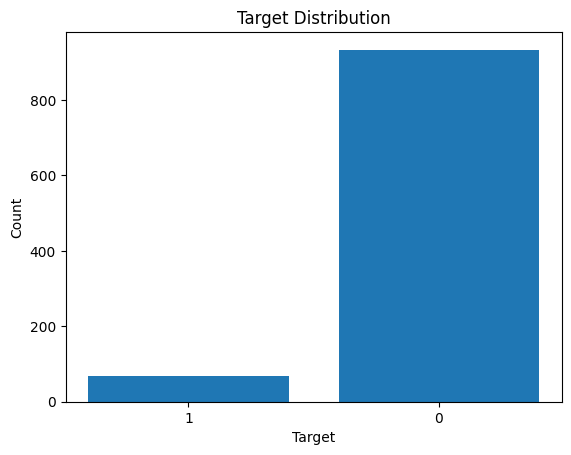

In [30]:
plot_target(sample_df,"target")

In [34]:
sample_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

## Data Cleaning

In [31]:
import nltk
from nltk.tokenize import word_tokenize


In [41]:
token = word_tokenize(sample_df.question_text.values[0])
token

['What',
 'is',
 'the',
 'most',
 'effective',
 'classroom',
 'management',
 'skill/technique',
 'to',
 'create',
 'a',
 'good',
 'learning',
 'environment',
 '?']

In [36]:
from nltk.corpus import stopwords

In [37]:
nltk.download('stopwords')
english_stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
', '.join(english_stop_words)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [39]:
def remove_stopwords(tokens):
  return [ word for word in tokens if word.lower() not in english_stop_words]


In [45]:
token

['What',
 'is',
 'the',
 'most',
 'effective',
 'classroom',
 'management',
 'skill/technique',
 'to',
 'create',
 'a',
 'good',
 'learning',
 'environment',
 '?']

In [47]:
stopwords_clean = remove_stopwords(token)
stopwords_clean

['effective',
 'classroom',
 'management',
 'skill/technique',
 'create',
 'good',
 'learning',
 'environment',
 '?']

In [44]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer(language='english')

In [50]:
stemmer_text = [stemmer.stem(i) for i in stopwords_clean]
stopwords_clean

['effective',
 'classroom',
 'management',
 'skill/technique',
 'create',
 'good',
 'learning',
 'environment',
 '?']

In [51]:
stemmer_text

['effect',
 'classroom',
 'manag',
 'skill/techniqu',
 'creat',
 'good',
 'learn',
 'environ',
 '?']

### Let's apply the vector on this data 

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
small_vect = CountVectorizer()


In [53]:
small_vect.fit(stemmer_text)

CountVectorizer()

In [56]:
small_vect.get_feature_names_out()

array(['classroom', 'creat', 'effect', 'environ', 'good', 'learn',
       'manag', 'skill', 'techniqu'], dtype=object)

In [57]:
small_vect.vocabulary_

{'effect': 2,
 'classroom': 0,
 'manag': 6,
 'skill': 7,
 'techniqu': 8,
 'creat': 1,
 'good': 4,
 'learn': 5,
 'environ': 3}

## Now final step is to Transoform data into vector

In [ ]:
vectors = small_vect.transform(sample_df.text_message[:10])